# Project 07 - Machine Learning

**Author:** Jugurtha Kacimi

**Github:** [https://github.com/jugurthakacimi/datafun-07-ml](https://github.com/jugurthakacimi/datafun-07-ml)

In [ ]:
# import libraries
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

## Part 1 - Chart a Straight Line

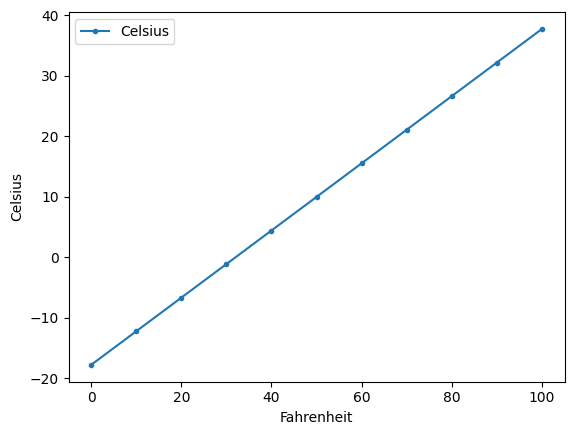

In [ ]:
# Equation for converting Fahrenheit to Celsius
c = lambda f: 5/9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Create a DataFrame and plot the data
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius']) 
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-') 
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [9]:
# Load NYC January high temperatures data
nyc_df = pd.read_csv('../data/ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [10]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [11]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [12]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly'] 
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [13]:
nyc_df.Date.dtype
nyc_df.Date = nyc_df.Date.floordiv(100) 
nyc_df.head(3) 

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [15]:
pd.set_option('display.precision', 2) 
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [20]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
print(f'linear_regression.slope = {linear_regression.slope}')
print(f'linear_regression.intercept = {linear_regression.intercept}')

linear_regression.slope = 0.014771361132966163
linear_regression.intercept = 8.694993233674289


### Section 6 - Predict

In [ ]:
# Predict the average high temperature in NYC in January 2024
linear_regression.slope * 2024 + linear_regression.intercept


np.float64(38.5922281667978)

### Section 7 - Visualization

(10.0, 70.0)

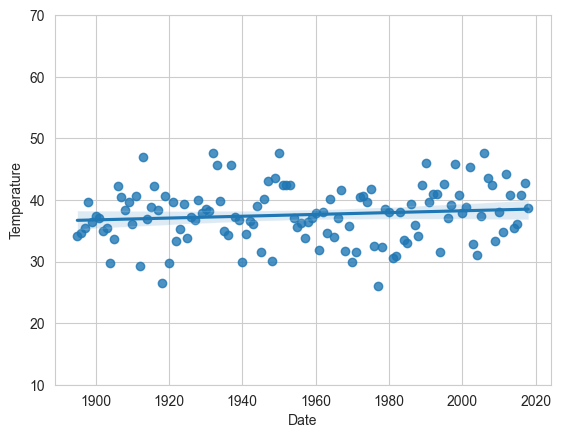

In [27]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10,70)

## Part 3 - Prediction

### Section 1 - Build the Model

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature.values, random_state=11)

In [39]:
# shape of the training set
X_train.shape

(93, 1)

In [40]:
# shape of the testing set
X_test.shape

(31, 1)

In [42]:
# train the model
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [43]:
# slope and intercept of the trained model
print(f'linear_regression.coef_ = {linear_regression.coef_}')
print(f'linear_regression.intercept_ = {linear_regression.intercept_}')

linear_regression.coef_ = [0.01939167]
linear_regression.intercept_ = -0.30779820252656975


### Section 2 - Test the Model

In [45]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted = {p:.2f}, expected = {e:.2f}')

predicted = 37.86, expected = 31.70
predicted = 38.69, expected = 34.80
predicted = 37.00, expected = 39.40
predicted = 37.25, expected = 45.70
predicted = 38.05, expected = 32.30
predicted = 37.64, expected = 33.80
predicted = 36.94, expected = 39.70


### Section 3 - Predict

In [46]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2024)

array([38.94094855])

### Section 4 - Visualization

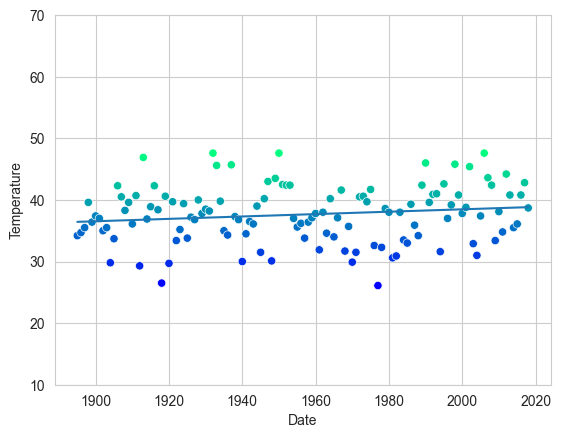

In [51]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10,70)
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y=predict(x)
line = plt.plot(x,y)